# Task 2 
### Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [1]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [2]:
data = pd.read_csv('data/crime_data.csv')
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.rename( columns={'Unnamed: 0':'States'}, inplace=True )

In [4]:
df = data.iloc[: , 1:].set_index(data.iloc[: , 0])

In [5]:
df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
df[df.duplicated()]

,Murder,Assault,UrbanPop,Rape
States,,,,


In [8]:
df.shape

(50, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [10]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# EDA

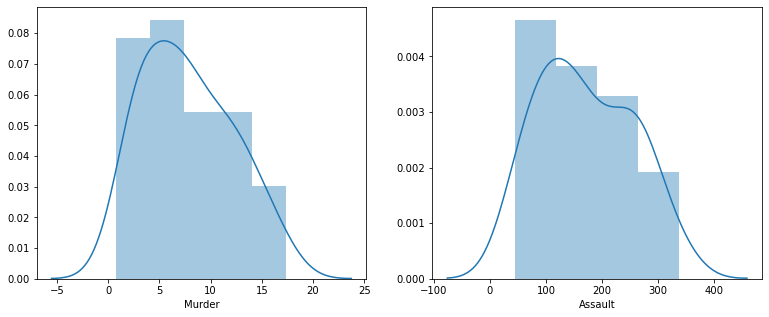

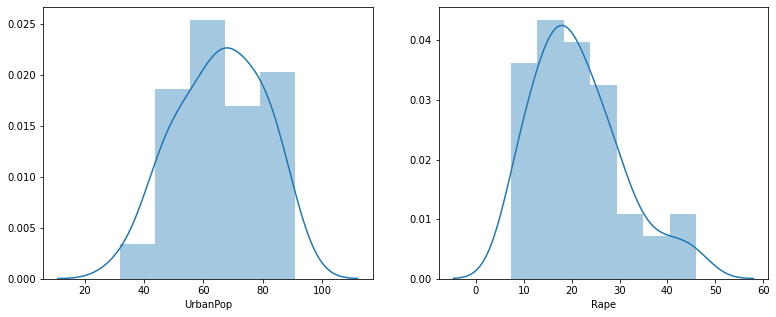

In [11]:
fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (13,5))

# distribution
sns.distplot(df.iloc[:,0] ,ax = ax1)
sns.distplot(df.iloc[:,1] ,ax = ax2)

fig , (ax1 , ax2) = plt.subplots(1,2 , figsize = (13,5))
sns.distplot(df.iloc[:,2] ,ax = ax1)
sns.distplot(df.iloc[:,3] ,ax = ax2)

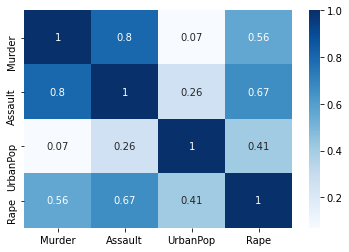

In [12]:
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

Text(0.5, 1.0, 'Assult rate')

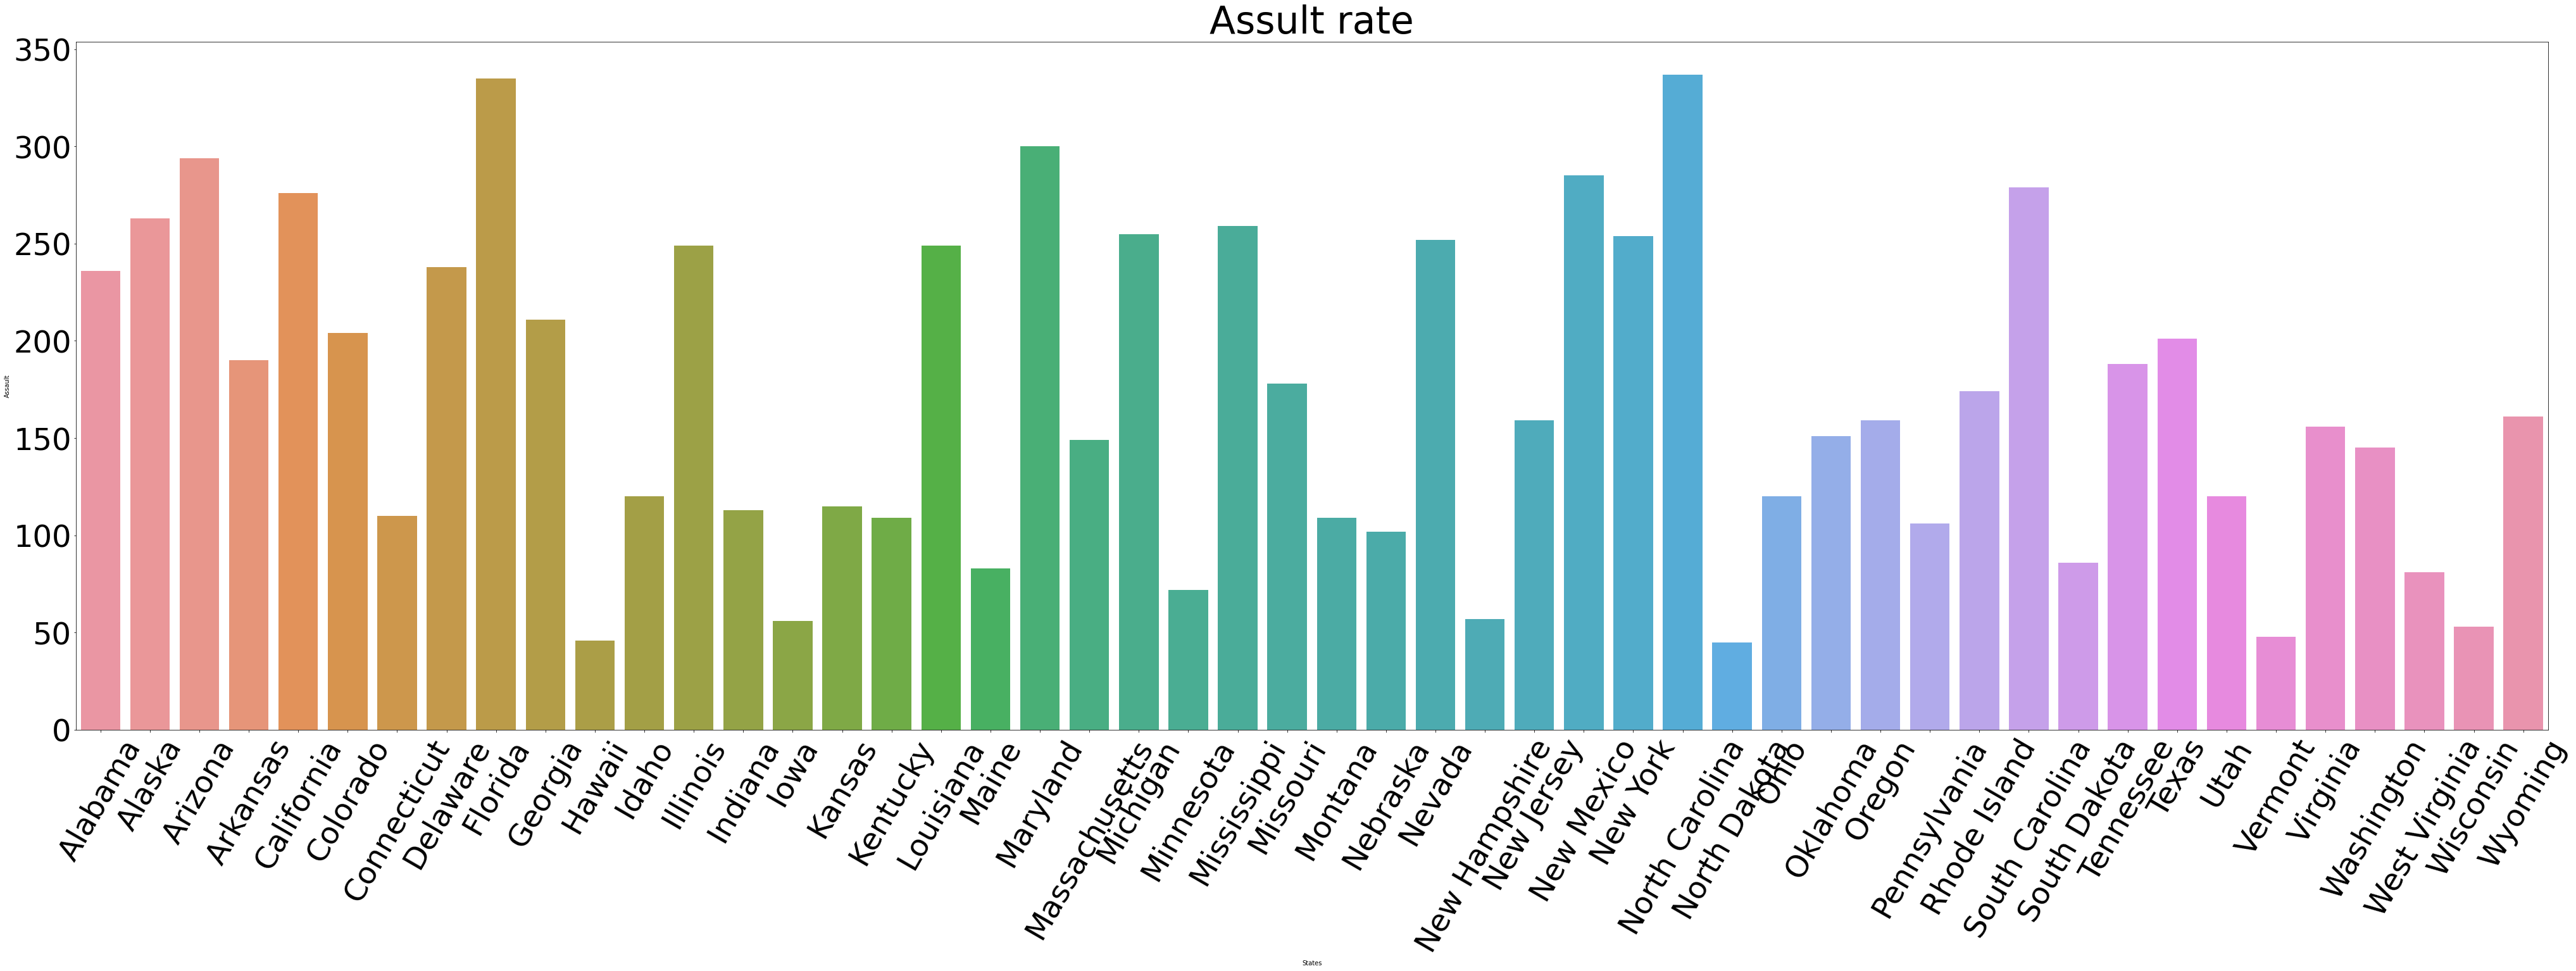

In [13]:
plt.figure(figsize = (70,20))
sns.barplot( x = 'States' , y = 'Assault' ,  data = data , orient = 'v')
plt.xticks(rotation = 60 , fontsize = 48)
plt.yticks(fontsize = 48)
plt.title('Assult rate' , fontsize = 60)

Text(0.5, 1.0, 'Murder rate')

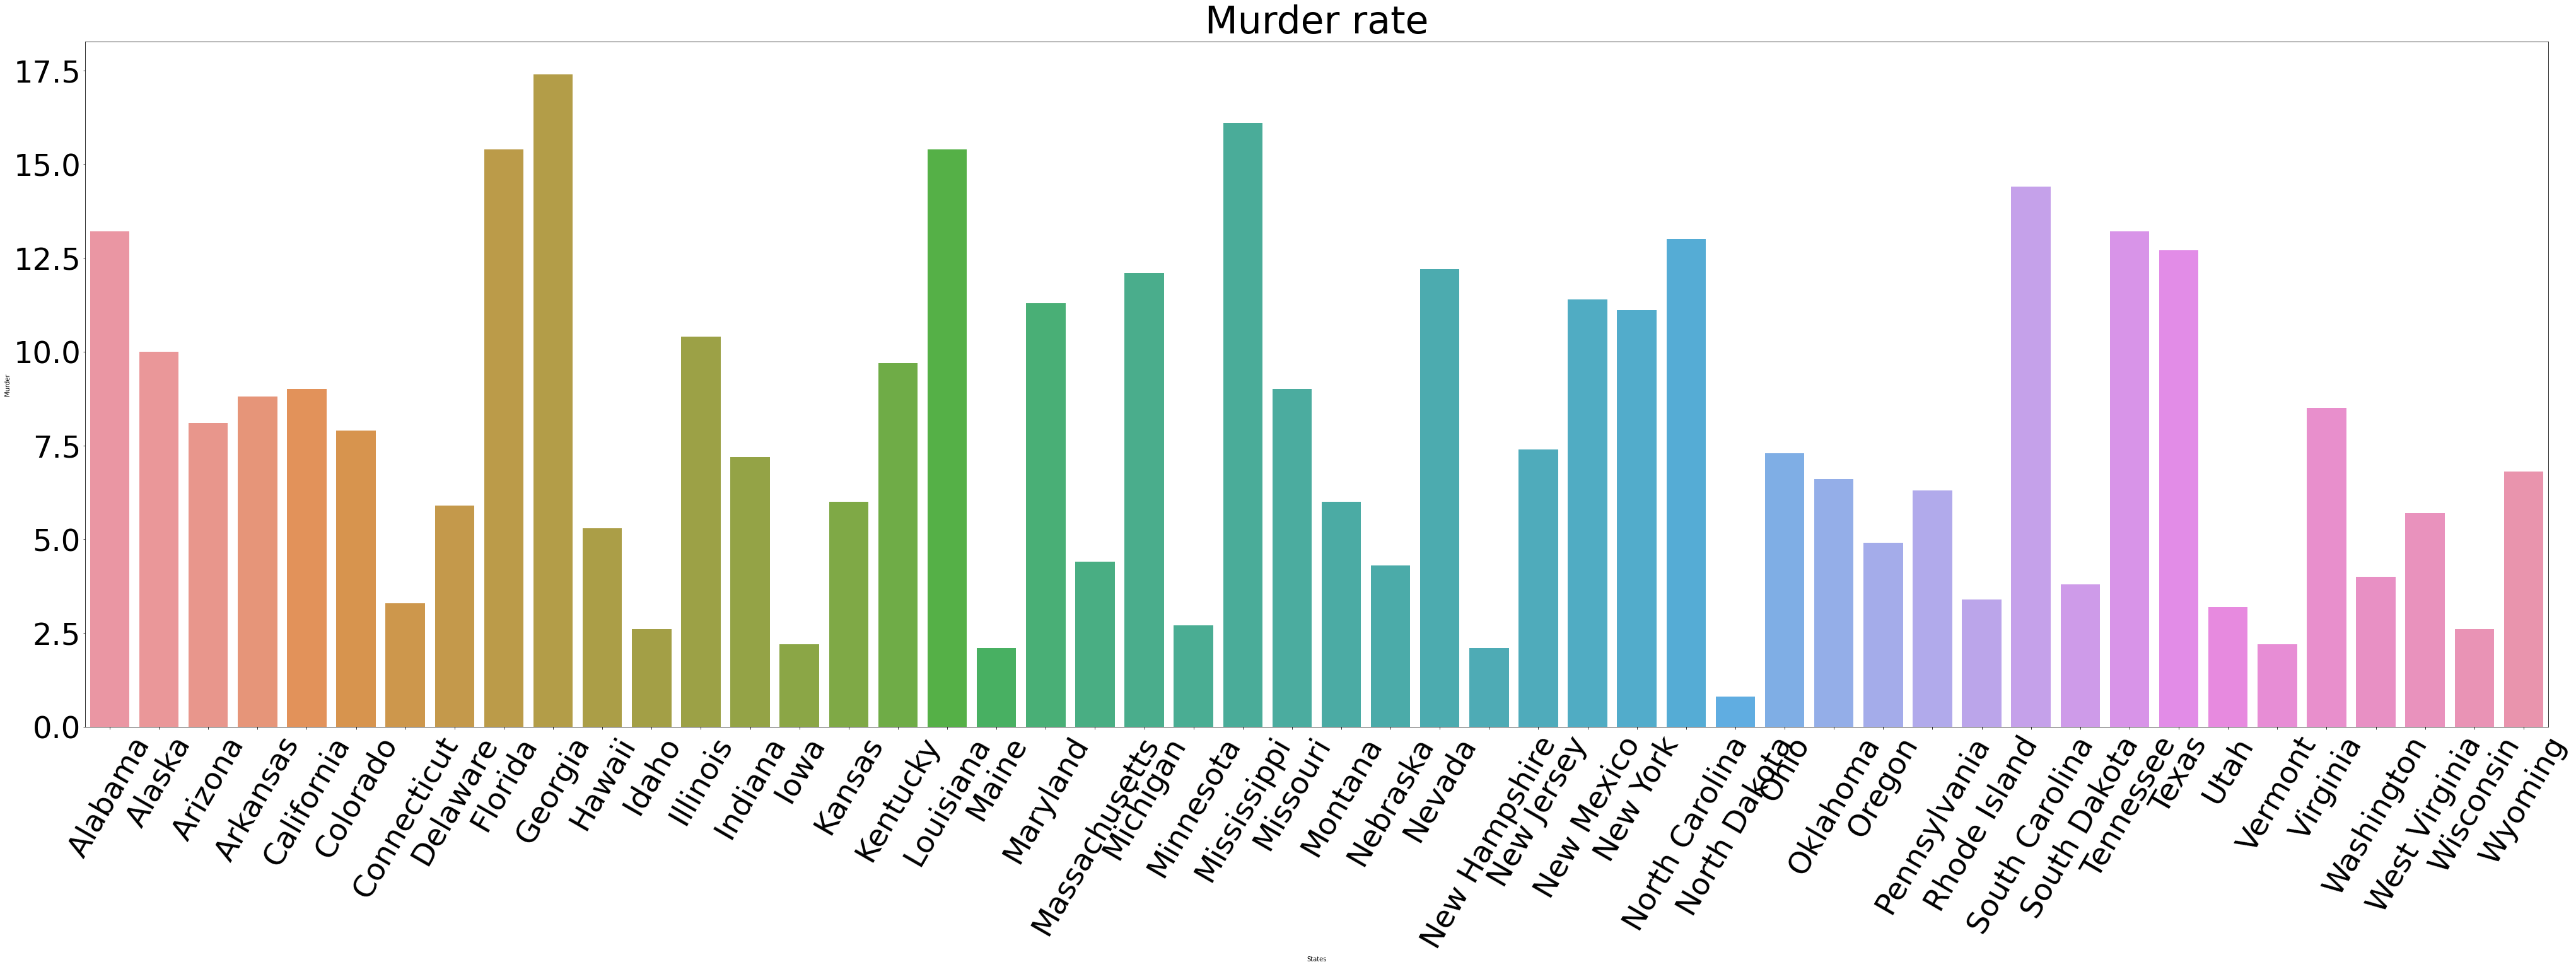

In [14]:
plt.figure(figsize = (70,20))
sns.barplot( x = 'States' , y = 'Murder' ,  data = data , orient = 'v')
plt.xticks(rotation = 60 , fontsize = 48)
plt.yticks(fontsize = 48)
plt.title('Murder rate' , fontsize = 60)

Text(0.5, 1.0, 'Rape rate')

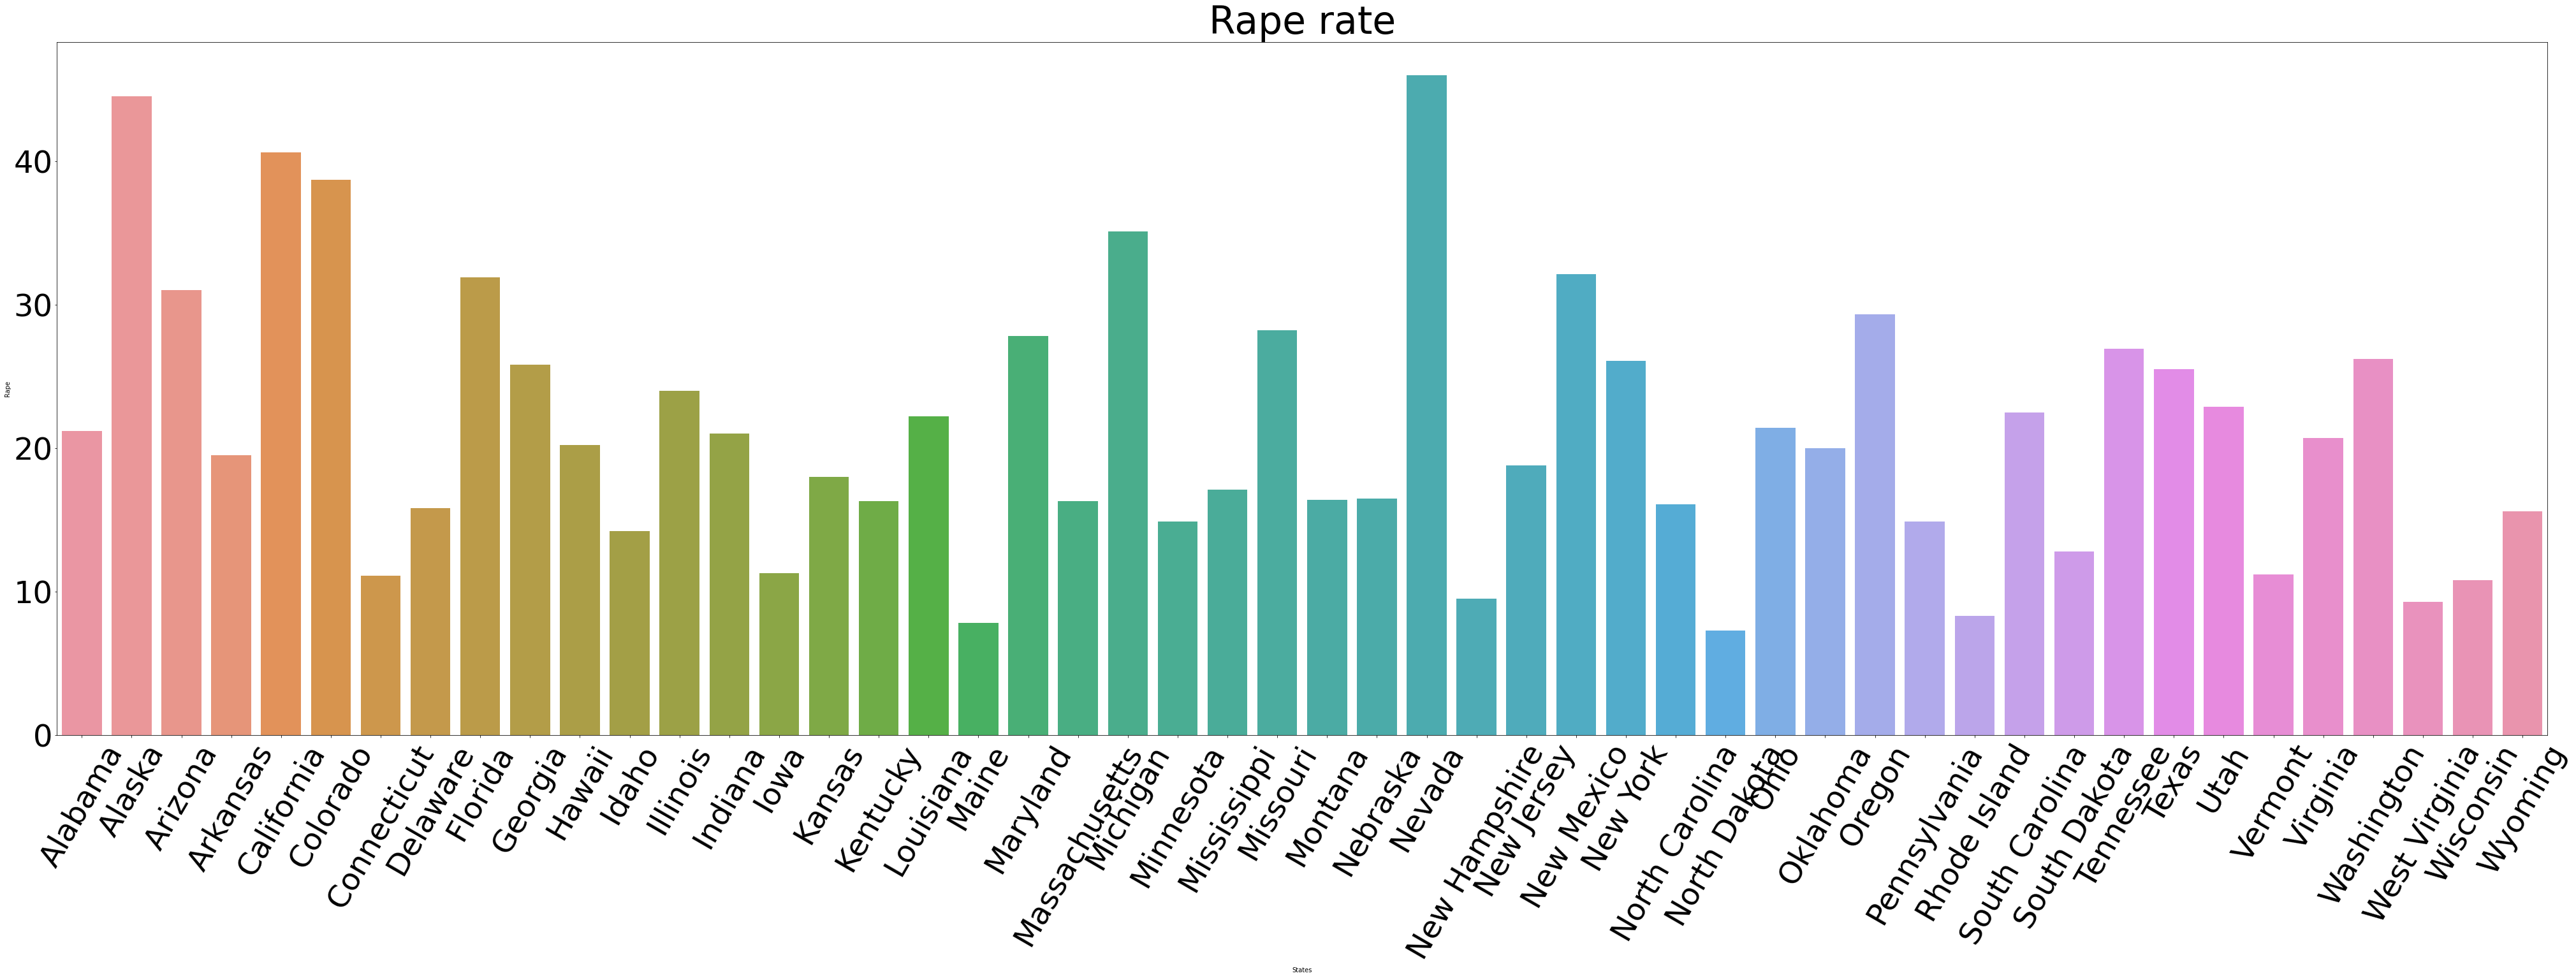

In [15]:
plt.figure(figsize = (70,20))
sns.barplot( x = 'States' , y = 'Rape' ,  data = data , orient = 'v')
plt.xticks(rotation = 60 , fontsize = 48)
plt.yticks(fontsize = 48)
plt.title('Rape rate' , fontsize = 60)

Text(0.5, 1.0, 'Urban Population across USA')

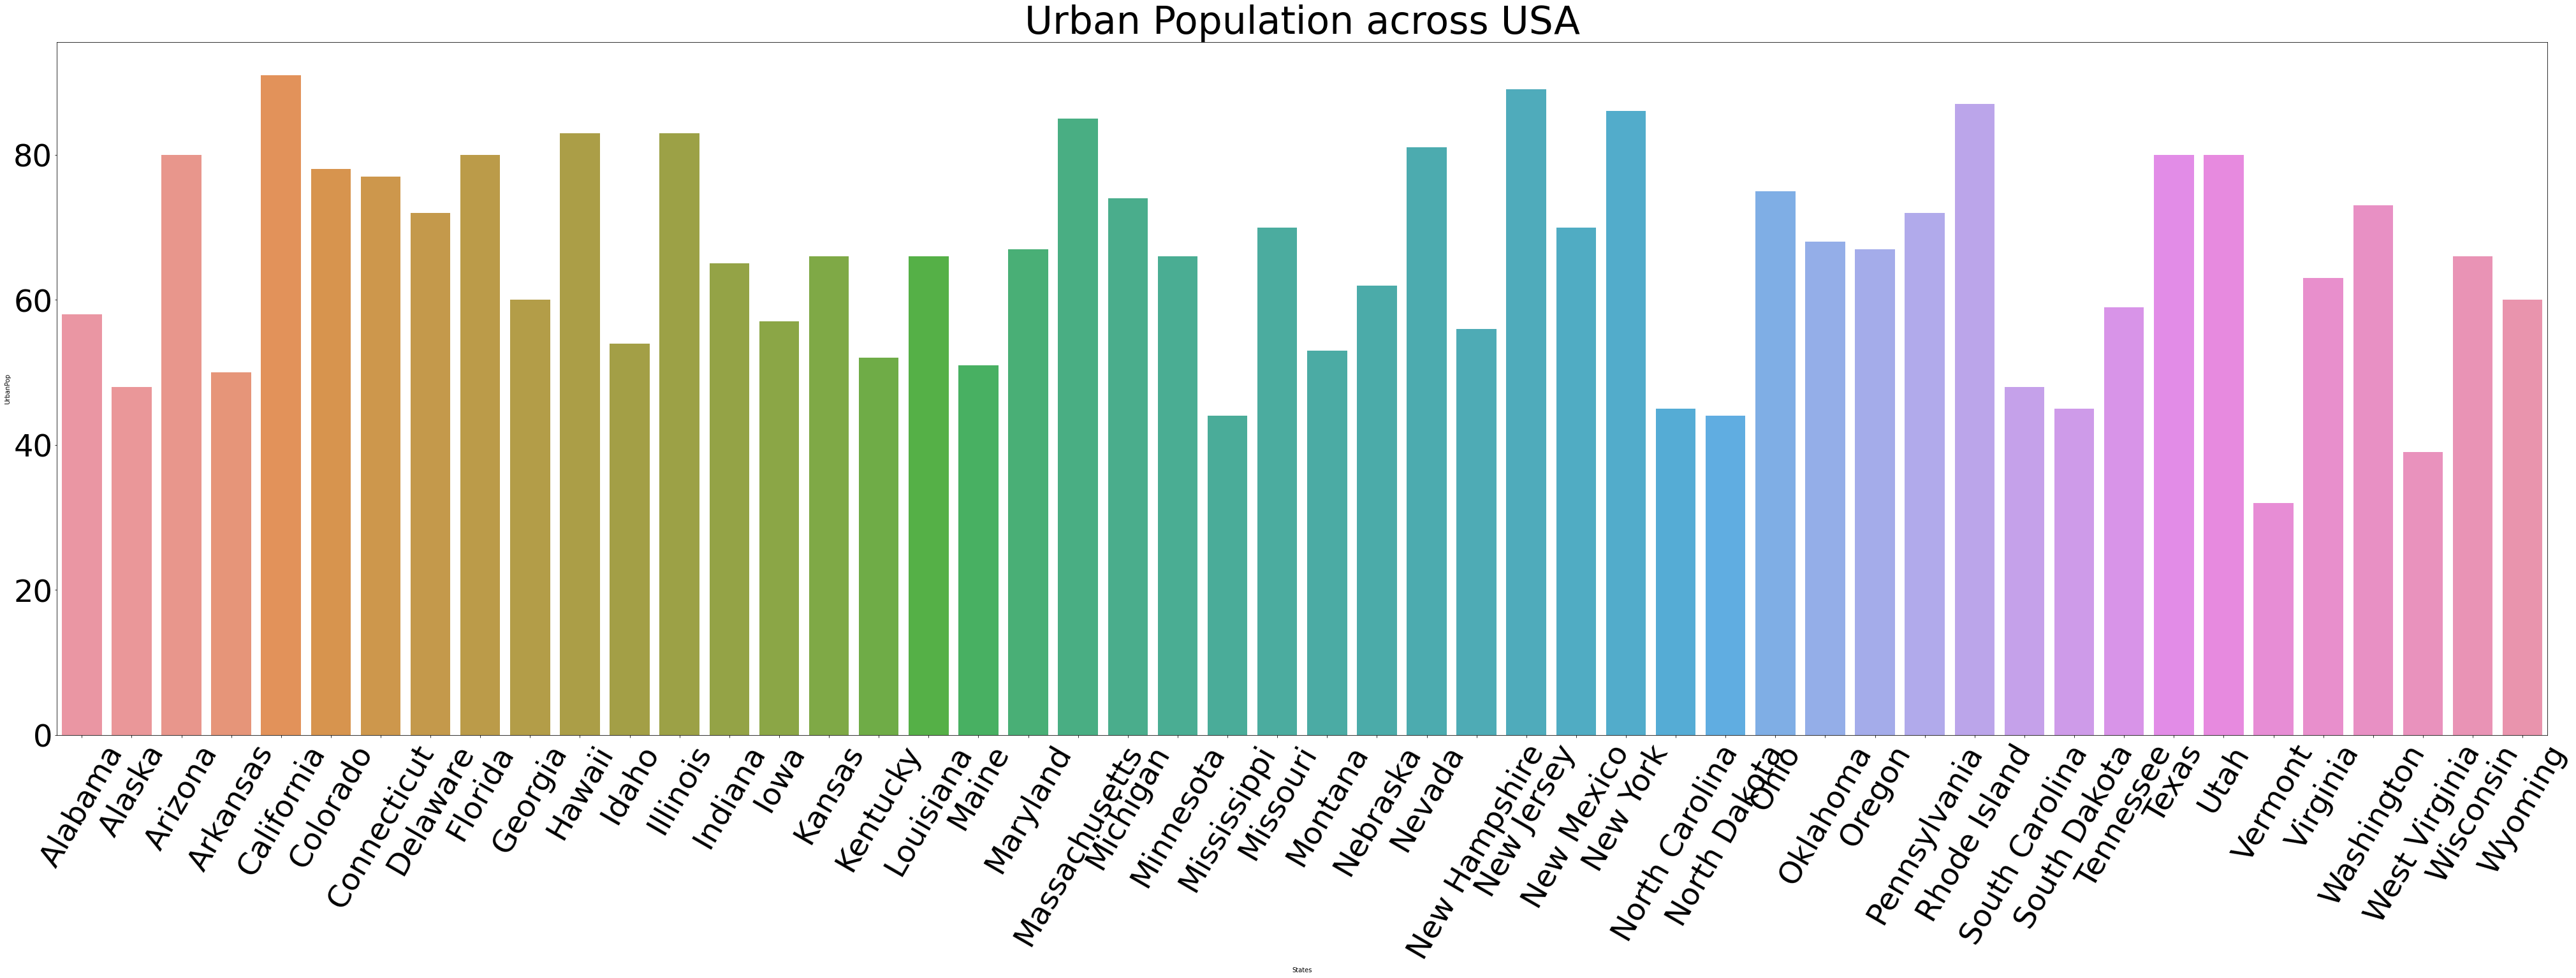

In [16]:
plt.figure(figsize = (70,20))
sns.barplot( x = 'States' , y = 'UrbanPop' ,  data = data , orient = 'v')
plt.xticks(rotation = 60 , fontsize = 48)
plt.yticks(fontsize = 48)
plt.title('Urban Population across USA' , fontsize = 60)

Text(0.5, 1.0, 'Assault rate vs Urban Population')

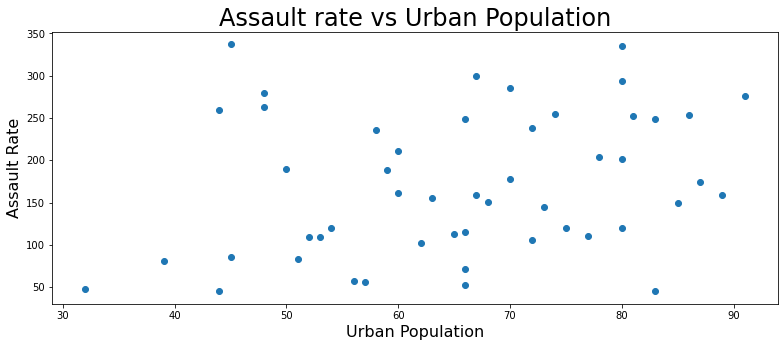

In [17]:
plt.figure(figsize = (13,5))
plt.scatter( x = 'UrbanPop' , y = 'Assault' ,  data = df)
plt.xlabel('Urban Population' , fontsize = 16)
plt.ylabel('Assault Rate' , fontsize = 16)
plt.title('Assault rate vs Urban Population' , fontsize = 24)

Text(0.5, 1.0, 'Murder rate vs Urban Population')

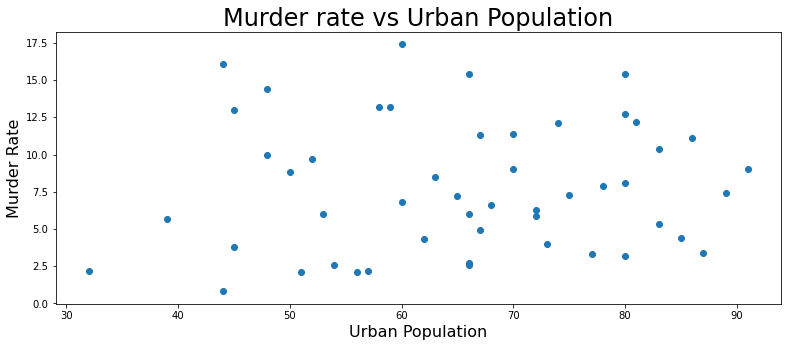

In [18]:
plt.figure(figsize = (13,5))
plt.scatter( x = 'UrbanPop' , y = 'Murder' ,  data = df)
plt.xlabel('Urban Population' , fontsize = 16)
plt.ylabel('Murder Rate' , fontsize = 16)
plt.title('Murder rate vs Urban Population' , fontsize = 24)

Text(0.5, 1.0, 'Rape rate vs Urban Population')

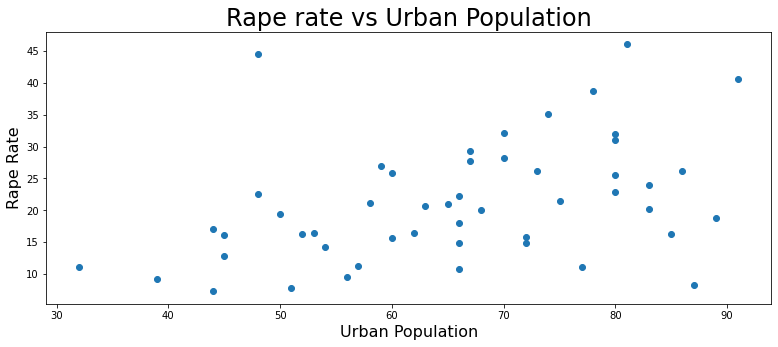

In [19]:
plt.figure(figsize = (13,5))
plt.scatter( x = 'UrbanPop' , y = 'Rape' ,  data = df)
plt.xlabel('Urban Population' , fontsize = 16)
plt.ylabel('Rape Rate' , fontsize = 16)
plt.title('Rape rate vs Urban Population' , fontsize = 24)

# Data Preprocessing

In [20]:
mms = MinMaxScaler()
df2 = mms.fit_transform(df)
df2 = pd.DataFrame(df2 , columns = ['Murder','Assault','UrbanPop','Rape'] , index = data['States'])

In [21]:
df2.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,0.746988,0.654110,0.440678,0.359173
Alaska,0.554217,0.746575,0.271186,0.961240
Arizona,0.439759,0.852740,0.813559,0.612403
Arkansas,0.481928,0.496575,0.305085,0.315245
California,0.493976,0.791096,1.000000,0.860465


# Clustering

## 1. K-Means

C:\Users\Harshpreet Singh\Anacondajupyternb\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


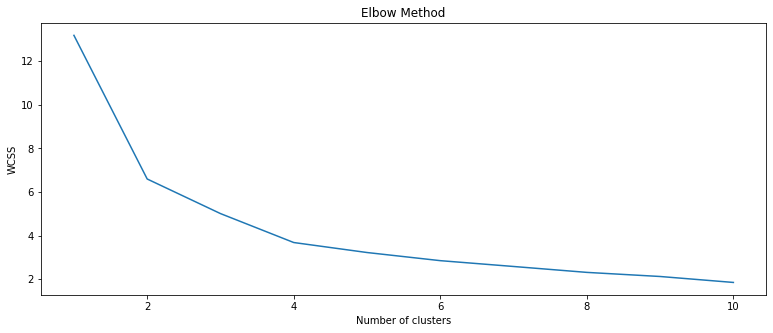

In [22]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (13,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(df2)

KMeans(n_clusters=4, random_state=0)

In [24]:
clusters_new.labels_

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1])

In [25]:
df3 = df.copy()

In [26]:
df3['K-Means Clusters'] = clusters_new.labels_

In [27]:
df3.groupby('K-Means Clusters').mean().T

K-Means Clusters,0,1,2,3
Murder,10.966667,5.852941,13.9375,3.600000
Assault,264.000000,141.176471,243.6250,78.538462
UrbanPop,76.500000,73.647059,53.7500,52.076923
Rape,33.608333,19.335294,21.4125,12.176923


# Inferences

C:\Users\Harshpreet Singh\Anacondajupyternb\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Rape rate vs Assault rate')

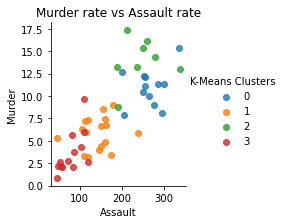

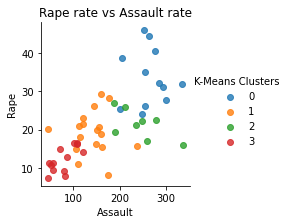

In [28]:
# Plot between pairs Murder~Assault
sns.lmplot( 'Assault', 'Murder', data= df3, hue = 'K-Means Clusters', fit_reg=False, size = 3)
plt.title('Murder rate vs Assault rate')

# Plot between pairs Rape~Assault
sns.lmplot( 'Assault' , 'Rape', data = df3 , hue = 'K-Means Clusters' , fit_reg= False , size = 3)
plt.title('Rape rate vs Assault rate')

## 2. Heirarchical Clustering

In [29]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'single')

In [30]:
y_hc = hc.fit_predict(df2)
hc.labels_

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
df3['Heirarchical Clusters'] = y_hc

In [32]:
df3.drop(['K-Means Clusters'], axis = 1).groupby('Heirarchical Clusters').mean().T

Heirarchical Clusters,0,1,2
Murder,7.583333,10.0,15.4
Assault,165.416667,263.0,335.0
UrbanPop,65.604167,48.0,80.0
Rape,20.525000,44.5,31.9


# Inferences

C:\Users\Harshpreet Singh\Anacondajupyternb\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Rape rate vs Assault rate')

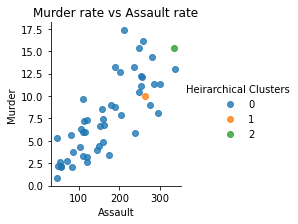

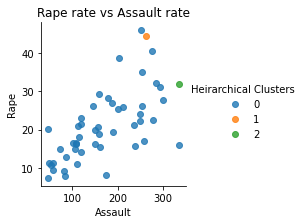

In [33]:
# Plot between pairs Murder~Assault
sns.lmplot( 'Assault', 'Murder' ,data= df3, hue = 'Heirarchical Clusters', fit_reg=False, size = 3)
plt.title('Murder rate vs Assault rate')

# Plot between pairs Rape~Assault
sns.lmplot( 'Assault' , 'Rape', data = df3 , hue = 'Heirarchical Clusters' , fit_reg= False , size = 3)
plt.title('Rape rate vs Assault rate')

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
        395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495]),
 <a list of 50 Text major ticklabel objects>)

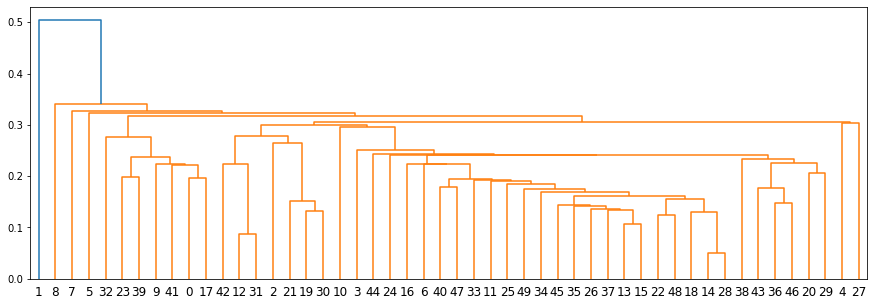

In [34]:
# DENDROGRAM
plt.figure(figsize = (15,5))
dendrogram = sch.dendrogram(sch.linkage(df2, method='single'))
plt.xticks(rotation = 0 , fontsize = 12)

## 3. DBSCAN 

In [35]:
dbscan = DBSCAN(eps=0.3, min_samples=4)
dbscan.fit(df2)

DBSCAN(eps=0.3, min_samples=4)

In [36]:
dbscan.labels_

array([ 0, -1,  1,  1, -1, -1,  1, -1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [37]:
df3['DBSCAN clusters'] = dbscan.labels_

In [38]:
# changing values of DBSCAN labels as they were starting from -1
df3['DBSCAN clusters'] = df3['DBSCAN clusters'].replace({-1:0 , 0:1 , 1:2 , 2:3})

In [39]:
df4 = df3.drop(['K-Means Clusters'] , axis = 1)
df4.drop(['Heirarchical Clusters'] , axis = 1).groupby('DBSCAN clusters').mean().T

DBSCAN clusters,0,1,2
Murder,10.066667,14.671429,6.116216
Assault,261.333333,251.285714,140.837838
UrbanPop,75.000000,54.285714,66.135135
Rape,36.250000,21.685714,18.710811


C:\Users\Harshpreet Singh\Anacondajupyternb\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Rape rate vs Assault rate')

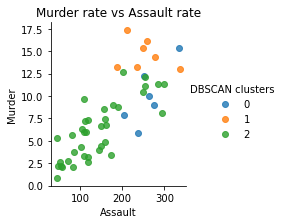

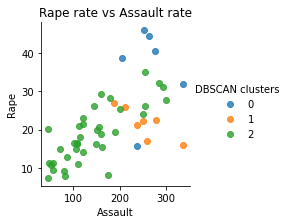

In [40]:
# Plot between pairs Murder~Assault
sns.lmplot( 'Assault', 'Murder' ,data= df3, hue = 'DBSCAN clusters', fit_reg=False, size = 3)
plt.title('Murder rate vs Assault rate')

# Plot between pairs Rape~Assault
sns.lmplot( 'Assault' , 'Rape', data = df3 , hue = 'DBSCAN clusters' , fit_reg= False , size = 3)
plt.title('Rape rate vs Assault rate')